# The Math of Intelligence Step #4

## by PARK-SI HYUNG. 2019-01-16.
---
# # RANDOM FOREST
> 여러개의 의사결정트리를 만들고, 투표를 시켜 다수결로 결과를 결정하는 모델
> 분류(CLASSIFICATION)과 회귀(REGRESSION) 모두가 가능한 모델입니다

![JPEG](https://camo.githubusercontent.com/f98ce1696645063e7f96f2bd21e3e5761fa6cb4b/68747470733a2f2f6d6170722e636f6d2f626c6f672f70726564696374696e672d6c6f616e2d6372656469742d7269736b2d7573696e672d6170616368652d737061726b2d6d616368696e652d6c6561726e696e672d72616e646f6d2d666f72657374732f6173736574732f626c6f67696d616765732f6372656469746465636973696f6e747265652e706e67)

### DECISION TREE를 기반으로 하는 모델
![JPEG](https://camo.githubusercontent.com/1809fcf8785b9b62bcbb269a5253e49bbf4f7671/68747470733a2f2f7072617465656b766a6f7368692e66696c65732e776f726470726573732e636f6d2f323031362f30332f322d747265652e706e67)

### CART(CLASSIFICATION AND REGREESION TREE)
- 여러개의 DECISION NODE로 구성되어 있습니다
- 각 노드는 SPECIFIC TEST를 수행해, YES OR NO를 판별합니다
- 트리의 맨 마지막에 다다를 때까지(분류될때까지), SPECIFIC TEST를 수행합니다
---
### 그렇다면 최적의 의사결정트리를 어떻게 구현해야 할까 ?
> ENTROPY / GINI INDEX를 이용하는 방법이 있습니다

- ENTROPY(데이터의 불확실성을 나타내는 정도)
- GINI INDEX(불균형의 정도를 나타냄, 불순도의 개념)
- 이번 강의에서는 GINI INDEX를 사용합니다

### GINI INDEX

> GINI계수가 높은 것을 선정합니다

![JPEG](https://i.imgur.com/Qcn9V4H.png)

- 랜덤포레스트는 구분 뒤 각 영역의 순도가 증가/ 불순도가 감소하는 방향으로 학습합니다
- GINI계수가 1일경우 완벽하게 분류가 되므로 최상의 상태입니다
- 만약 0.5의 비율로 분류될 경우(최악), 1-(0.25+0.25) = 0.5로 불순도가 최대가됩니다

### PRUNING(가지치기)

- 필요없는 노드는 가지치기 하듯이 삭제해버립니다, ACCURACY를 높여줍시다

![JPEG](https://i.imgur.com/P7ZN4XF.png)

In [1]:
# 날씨 데이터를 가지고 랜덤포레스트를 만들어봅시다
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
# feature들의 수를 출력해봅시다. 12개의 column과 348개의 row로 이루어져있습니다
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


#### PLOT 그래프를 그려보면 다음과 같습니다
![JPEG](https://cdn-images-1.medium.com/max/800/1*kQOOIx0Sed4Ohjh2NWsf1g.png)

In [3]:
# ONE-HOT ENCODING을 이용해서 MONDAY ~ FRIDAY까지 바꿔줍시다
# MON : (1,0,0,0,0), TUE : (0,1,0,0,0), WED : (0,0,1,0,0)
# THE : (0,0,0,1,0). FRI : (0,0,0,0,1)

# get_dummies 기능을 이용해 5개의 column을 추가한 후 ONE-HOT ENCODING된
# MONDAY ~ SUNDAY까지 집어넣어줍시다

features = pd.get_dummies(features)
features.iloc[:,5:].head()

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [4]:
# feature와 label을 분리하고 array로 바꿔줍시다
import numpy as np

# label은 우리가 예측하고 싶은 변수입니다 (실제온도)
labels = np.array(features['actual'])

# 이제 feature에서 label은 삭제해줍니다
# axis=1 꼭 해줘야 column이 사라집니다
features = features.drop('actual', axis = 1)
feature_list = list(features.columns)

# array로 바꿔줍니다
features = np.array(features)

# train set과 test set으로 나눠줍니다 (3:1 비율로)
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [5]:
# 제대로 나눠졌는지 확인해봅시다
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [6]:
# baseline을 지정합시다. 우리는 baseline보다 개선되는 모델을 만들어야하기때문입니다.
# 최대온도의 평균을 baseline으로 지정해줍니다
# baseline의 error는 
baseline_preds = test_features[:, feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)

# 우리의 baseline error입니다. 우리는 최소한 baseline error보다는
# 좋은 모델을 만들어야합니다
print('Average baseline error: ', round(np.mean(baseline_errors),2))

Average baseline error:  5.06


In [7]:
# scikit learn에서 랜덤포레스트 모듈을 불러옵니다
from sklearn.ensemble import RandomForestRegressor
# number of tree를 1000개로 지정하고, 재사용하기 위해 random_state를 지정해줍니다
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# fit 해줍니다
rf.fit(train_features, train_labels);

In [8]:
# 예측을 해봅니다
predictions = rf.predict(test_features)
# error를 계산해봅시다
errors = abs(predictions - test_labels)
# 소수점 2자리까지 반올림을 해줍니다. 
# error가 baseline error보다 낮음을 알 수 있습니다
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [9]:
# 정확도를 구하기 위해 mean absolute percentage error를 구ㅐㅎ봅시다
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


In [10]:
# 우리가 만든 tree를 visualization 해봅시다
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

### 다음과 같은 트리가 나옵니다.

![JPEG](https://lh3.googleusercontent.com/NN_k7VNRcFlup-1jtOWjvNutd33mAisJZPMqfw35bIzES2BdE0cOamB29hPbhvQcSvpIPfBEtjuE8-3owUK9=w948-h937-rw)

In [11]:
# 어떤 변수가 가장 중요한 역할을 하는지 알아봅시다
importances = list(rf.feature_importances_)
# 변수와 중요도를 묶어 튜플로 만듭니다. 튜플은 값을 바꿀 수 없습니다
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# 내림차순으로 정렬합니다
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
# 출력해봅시다. temp_1이 가장 중요도가 높은걸 알 수 있습니다
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [12]:
# 우리는 하루 전의 기온이 가장 중요하다는 걸 알수있습니다
# 이번에는 가장 중요한 변수인 temp_1과 두번째로 중요한 average 두 변수만 가지고
# 랜덤포레스트를 만들어보겠습니다
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# 중요한 두 변수만 뽑아옵니다
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

# 훈련시켜봅시다
rf_most_important.fit(train_important, train_labels)
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

# 두 변수만 가지고 해도 별 차이가 나지 않는것을 볼 수 있습니다

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


Text(0.5, 1.0, 'Variable Importances')

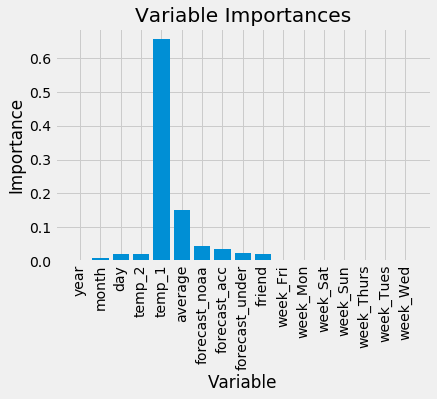

In [13]:
# 변수별로 중요도를 시각화 해봅니다
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))

# bar chart를 만듭니다
plt.bar(x_values, importances, orientation='vertical')
# x축을 정해줍니다
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

Text(0.5, 1.0, 'Actual and Predicted Values')

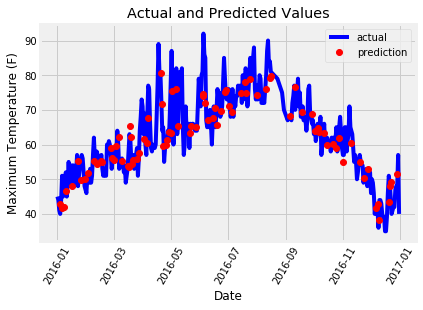

In [14]:
# 날짜별로 나타내기 위해 datetime을 이용해 그래프를 그려봅시다
import datetime
# 년,월,일 별로 추출합니다
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]

#datetime object로 바꿔줍니다
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# dates를 DataFrame으로 바꿔줍니다. actual에는 실제 온도를 지정해줍니다
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# 예측 온도에 사용할 년,월,일을 뽑아줍니다
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# columns으로 바꾸기 위해 list에 저장해둡니다
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# dates를 datetime obeject로 바꿔줍니다
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# 예측온도 DataFrame을 만들어줍니다
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

# 실제 온도는 파란색 선으로 나타냅니다
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

# 예측 온도는 red dot으로 나타냅니다
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
# x축을 읽기 쉽게 60도 돌려줍니다
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date')
plt.ylabel('Maximum Temperature (F)')
plt.title('Actual and Predicted Values')

#   
#   
#   

# # HYPERPARAMETER OPTIMIZATION
> 성능 최적화를 위해 머신러닝 모델에 설정해주는 것

![JPEG](https://image.slidesharecdn.com/commonproblemsinhyperparameteroptimization21-170324153628/95/common-problems-in-hyperparameter-optimization-3-638.jpg?cb=1490369836)

### HYPERPARAMETER들의 종류들
- LEARNING RATE : 학습진도율(너무 낮아도, 너무 커도 안된다)
- COST FUNCTION : 측정된 값에서 연산된 값간의 차이를 연산하는 함수
- REGULARIZATION PARAMETER : 오버피팅을 피해가 위해 L1/L2 REGULARIZATION
- MINI-BATCH SIZE : 미니 배치 사이즈
- TRAINING : 반복횟수
---
# 최적의 PARAMETER 선택하기

- GRID SEARCH : 직접 범위를 지정해줘서, 범위내의 HYPERPARAMETER를 선택해 실험
- RANDOM SEARCH : HYPERPARAMETER를 랜덤하게 선택해 모델을 실험하는 기법

> 하지만 시간이 오래걸리는 단점이 존재합니다

# BAYESIAN OPTIMIZATION

> 위의 두가지 기법을 보완하는 방법으로 PRIOR KNOWLEDGE를 활용합니다


- 현재까지의 실험 결과를 바탕으로 통계적인 모델을 만들고
- 그것을 바탕으로 다음 탐색을 해야 할 방향을 효과적으로 정하는 방법

### HOW BAYESIAN WORKS ?

> 가우시안 분포를 사용합니다

![JPEG](https://github.com/fmfn/BayesianOptimization/raw/master/examples/bo_example.png)

- 최적화하려는 함수를 가장 잘 설명하는 함수의 사후 분포(GAUSSIAN PROCESS)를 구성합니다
- 관측치 수가 증가하면 사후 분포가 개선되고 알고리즘은 탐색 할 가치가있는 영역과 
  그렇지 않은 영역 중 더 명확 해집니다 (위의 그림 참조)



![GIF](https://github.com/fmfn/BayesianOptimization/raw/master/examples/bayesian_optimization.gif)

In [15]:
# BAYESIAN OPTIMIZATION을 실습해 봅시다
# pip install bayesian-optimization
# BAYESIAN OPTIMIZER를 불러옵니다
from bayes_opt import BayesianOptimization

# 우리가 최적화 하고 싶은 함수를 설정합니다
def black_box_function(x, y):
    # 임의로 함수를 설정해보겠습니다
    return -x ** 2 - (y - 1) ** 2 + 1

# 분포를 설정해줍니다
pbounds = {'x': (2, 4), 'y': (-3, 3)}

# BAYESIANOPTIMIZER에 함수와 X,Y 분포를 설정해줍니다
optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

# OPTIMIZER를 실행해줍니다
# init_points : random exploration을 얼마나 할지
# n_iter : 얼마나 돌려볼지
optimizer.maximize(
    init_points=2,
    n_iter=3,
)
# 최적의 optimizer를 print 해봅시다
print(optimizer.max)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -7.135    |  2.834    |  1.322    |
|  2        | -7.78     |  2.0      | -1.186    |
|  3        | -19.0     |  4.0      |  3.0      |
|  4        | -16.3     |  2.378    | -2.413    |
|  5        | -4.441    |  2.105    | -0.005822 |
{'target': -4.441293113411222, 'params': {'x': 2.104665051994087, 'y': -0.005822117636089974}}


#   
#   
#   

# # GAUSSIAN MIXTURE MODEL


![JPEG](https://i.imgur.com/5uECB14.png)

---
# WHAT IS GAUSSIAN ?

> 분포란 실험의 결과물들이며 확률은 각 결과와 관련돼있다

- MEAN : 평균
- STANDARD DEVIATION : 평균
- 표본 평균들이 이루는 분포는 샘플 크기가 큰 경우 GAUSSIAN 분포를 따릅니다
- 독립적인 확률변수들의 평균은 GAUSSIAN 분포에 가까워지는 성질이 있습니다
#   

![JPEG](https://camo.githubusercontent.com/37c9dcc23749e344089d9c30d74bde9a821eaa81/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f612f61392f456d7069726963616c5f52756c652e504e472f34353070782d456d7069726963616c5f52756c652e504e47)
#   
# WHAT IS GAUSSIAN MIXTURE MODEL ?

> GAUSSIAN 분포가 여러 개 혼합된 CLUSTERING 알고리즘

#### VARIANCE-COVARIANCE MATRIX
- 앞에서 배웠던 COVARIANCE는 한 변수가 다른 변수에 얼마나 영향을 주는지 나타냅니다
- 두 변수가 선형적으로 얼마나 연관돼어있는지 알 수 있습니다
![JPEG](https://i.imgur.com/y6iaeGO.png)

#   

# HOW IS IT OPTIMIZED?
> 확률을 가장 높이는 방식인 EXPECTATION-MAXIMIZATION(EM) 알고리즘을 사용합니다 

#### EM ALGORITHM
- E-STEP : 주어진 DATA의 HIDDEN VARIABLE 분포를 추정하고 PARAMETER의 CURRENT VALUE를 추정합니다
- M-STEP : DATA와 HIDDEN VARIABLE간의 결합확률분포를 최대화합니다
---

# WHEN SHOULD I USE IT ?

#### 고객의 이탈행동(구독정지) 발견, VIDEO FRAME에서 사물 인식 등에 사용됩니다
![JPEG](https://i.imgur.com/1wnb9ic.png)
#   

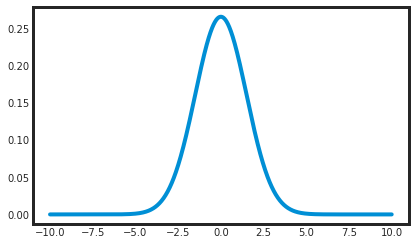

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
sns.set_style('white')
%matplotlib inline

# 가우시안분포를 그려봅시다
# 균일한 공간을 나타냅니다
x = np.linspace(start=-10, stop=10, num=1000)
# 연속적인 랜덤 변수들
y = stats.norm.pdf(x, loc=0, scale=1.5)
plt.plot(x,y)

In [17]:
# data를 읽어옵니다
df = pd.read_csv('bimodal_example.csv')
df.head()

,x
0,0.252851
1,-1.034562
2,3.319558
3,4.552363
4,-0.775995


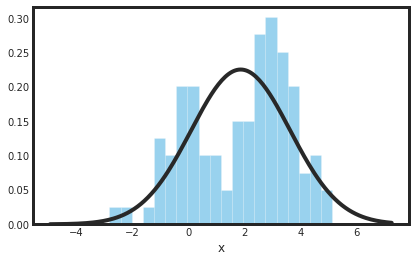

In [18]:
# x column의 분포를 확인해봅니다
# GAUSSIAN 분포도 같이 나타냅니다
data = df['x']
# bins는 밀집도를 나타냅니다.
sns.distplot(data, fit=stats.norm, bins=20, kde=False)

In [19]:
# GAUSSIAN을 정의해봅시다
class Gaussian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
    
    # probability density function
    def pdf(self, datum):
        # current parameter로부터의 data point에서 확률
        u = (datum - self.mu) / abs(self.sigma)
        y = (1/sqrt(2*pi) * abs(self.sigma)) * exp(-u * u / 2)
        return y
    
    # model values 출력
    def __repr__(self):
        return 'Gaussian({0;4.6}, {1:4.6})'.format(self.mu, self.sigma)

best_single = Gaussian(np.mean(data), np.std(data))
print('Best single Gaussian: μ = {:.2}, σ = {:.2}'.format(best_single.mu, best_single.sigma))

Best single Gaussian: μ = 1.9, σ = 1.8


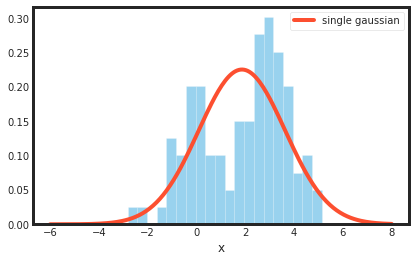

In [20]:
# SINGLE GAUSSIAN CURVE를 DATA에 적용시켜 봅시다
# 하지만 아직 EXPECTATION-MAXIMIZATION(EM) 알고리즘을 사용하진 않았습니다
x = np.linspace(-6, 8, 200)
g_single = stats.norm(best_single.mu, best_single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True)
plt.plot(x, g_single, label='single gaussian')
plt.legend();

#   
#   
#   